# Analyze Lending Club's Issued Loans


## Introduction

- This lending club loan data set contains complete loan data for all loans issued through the 2007-2015. The file is a matrix of about 890 thousand observations and 75 variables. 


- In this project, I will conduct the exploratory data analysis and build a model to predict.  

### Reading in libraries

In [140]:
import warnings; warnings.simplefilter('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
%matplotlib inline

### Reading in data

In [3]:
data = pd.read_csv('loan.csv')

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# check the columns and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [7]:
# check the missing values
data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51457
emp_length                          0
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761350
purpose                             0
title                             151
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

#### Observations:
- There are 74 columns (variables) and total 887379 entries in this data set.
- 2/3 of the variables are numerals and 1/3 are categories.
- Some variables were dominated by missing values, which should be excluded in the analysis.
- I will choose several factors out of the total 74 variables to conduct the analysis as well as the model building. 


## Exploratory Data Analysis 

In [8]:
# select the used variables based on experience
used_cols = ['loan_amnt', 'term', 'int_rate', 'grade', 'issue_d', 'addr_state', 'loan_status']
used_data = data[used_cols]

In [9]:
used_data.head()

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status
0,5000.0,36 months,10.65,B,Dec-2011,AZ,Fully Paid
1,2500.0,60 months,15.27,C,Dec-2011,GA,Charged Off
2,2400.0,36 months,15.96,C,Dec-2011,IL,Fully Paid
3,10000.0,36 months,13.49,C,Dec-2011,CA,Fully Paid
4,3000.0,60 months,12.69,B,Dec-2011,OR,Current


### 1. The Distribution of Loan Status

In [12]:
used_data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

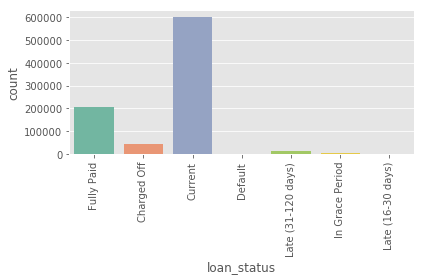

In [90]:
df_status = data.loc[data['loan_status'].isin(
        ['Current', 'Charged Off', 'Default', 'Fully Paid', 'In Grace Period', 'Late (16-30 days)',
         'Late (31-120 days)'])]
plt.xticks(rotation=90)
plt.xlabel('Loan Status')
sns.countplot(df_status['loan_status'], palette='Set2')
plt.tight_layout()
plt.savefig('loan_status.png')
plt.show()

### 2. Loan Amount Distribution by Month


In [30]:
# Tranfer the datetime

time = pd.to_datetime(used_data['issue_d'])
used_data.loc[:,'issue_d2'] = time


In [31]:
used_data.head()

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,issue_d2
0,5000.0,36 months,10.65,B,Dec-2011,AZ,Fully Paid,2011-12-01
1,2500.0,60 months,15.27,C,Dec-2011,GA,Charged Off,2011-12-01
2,2400.0,36 months,15.96,C,Dec-2011,IL,Fully Paid,2011-12-01
3,10000.0,36 months,13.49,C,Dec-2011,CA,Fully Paid,2011-12-01
4,3000.0,60 months,12.69,B,Dec-2011,OR,Current,2011-12-01


In [32]:
data_group_by_date = used_data.groupby(['issue_d2']).sum()
print(data_group_by_date.head())

            loan_amnt  int_rate
issue_d2                       
2007-06-01    91850.0    235.55
2007-07-01   348325.0    702.99
2007-08-01   515300.0    854.22
2007-09-01   372950.0    660.55
2007-10-01   753225.0   1306.04


In [43]:
data_group_by_date.reset_index(inplace=True)
data_group_by_date['issue_month'] = data_group_by_date['issue_d2'].apply(lambda x: x.to_period('M'))

load_amount_group_by_month = data_group_by_date.groupby('issue_month')['loan_amnt'].sum()
load_amount_group_by_month_df = pd.DataFrame(load_amount_group_by_month).reset_index()
print('\n Sum of loan amount by month: ')
print(load_amount_group_by_month_df.head())


 Sum of loan amount by month: 
  issue_month  loan_amnt
0     2007-06    91850.0
1     2007-07   348325.0
2     2007-08   515300.0
3     2007-09   372950.0
4     2007-10   753225.0


In [34]:
# save the results to csv
load_amount_group_by_month_df.to_csv('load_amount_by_month.csv', index=False)

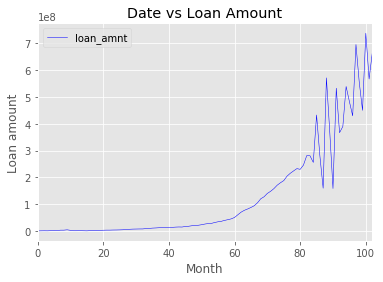

In [91]:
load_amount_group_by_month_df.plot(color="blue", linewidth=.5)
plt.xlabel('Month')
plt.ylabel('Loan amount')
plt.title('Date vs Loan Amount')
plt.savefig('loan_amount_vs_month.png')
plt.show()


### 3. Loan Amount Distribution by State


In [128]:
data_group_by_state = used_data.groupby(['addr_state'])['loan_amnt'].sum()
data_group_by_state_df = pd.DataFrame(data_group_by_state)
print('\nSum of loan amount by state：')
data_group_by_state_df.sort_values(['loan_amnt'],ascending=False)[0:10]


Sum of loan amount by state：


,loan_amnt
addr_state,
CA,1.898145e+09
TX,1.109130e+09
NY,1.076942e+09
FL,8.489891e+08
IL,5.390684e+08
NJ,5.152530e+08
PA,4.556429e+08
GA,4.347096e+08
OH,4.226754e+08


In [69]:
# save the result
data_group_by_state_df.to_csv('load_amount_by_state.csv', index=False)

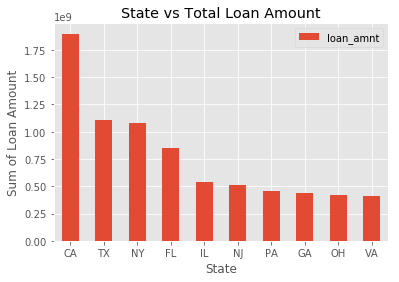

In [92]:
data_group_by_state_df.sort_values(['loan_amnt'],ascending=False)[0:10].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Sum of Loan Amount')
plt.title('State vs Total Loan Amount')
plt.xticks(rotation=360)
plt.savefig('loan_amount_vs_state.png')
plt.show()


### 4. Grade, Term, and Interest Rate

In [82]:
data_group_by_grade_term = used_data.groupby(['grade', 'term'])['int_rate'].mean()
data_group_by_grade_term_df = pd.DataFrame(data_group_by_grade_term).reset_index()
print('\nRelation among Grade,Term,Interest Rate：')
print(data_group_by_grade_term_df.head(10))
# Save the results
data_group_by_grade_term_df.to_csv('intrate_by_grade_term.csv', index=False)


Relation among Grade,Term,Interest Rate：
  grade        term   int_rate
0     A   36 months   7.215919
1     A   60 months   7.998581
2     B   36 months  10.864500
3     B   60 months  10.655718
4     C   36 months  13.921937
5     C   60 months  14.093312
6     D   36 months  17.163474
7     D   60 months  17.190871
8     E   36 months  19.764985
9     E   60 months  19.956477


In [83]:
 # Transfer to pivot table
data_group_by_grade_term_pivot = data_group_by_grade_term_df.pivot(index='grade', columns='term', values='int_rate')

data_group_by_grade_term_pivot.to_csv('intrate_by_grade_term2.csv')

In [84]:
print(data_group_by_grade_term_pivot)

term    36 months   60 months
grade                        
A        7.215919    7.998581
B       10.864500   10.655718
C       13.921937   14.093312
D       17.163474   17.190871
E       19.764985   19.956477
F       23.325132   23.644718
G       23.982595   25.861530


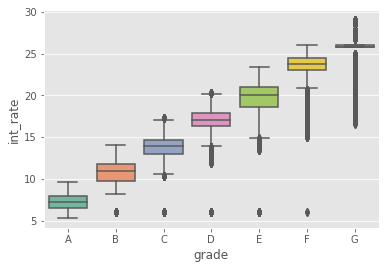

In [101]:
sns.boxplot(x='grade', y='int_rate', data=used_data, order = 'ABCDEFG', palette='Set2')

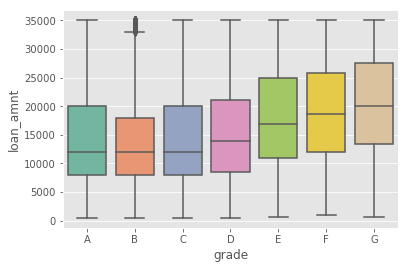

In [102]:
sns.boxplot(x='grade', y='loan_amnt', data=used_data, order = 'ABCDEFG',palette='Set2')

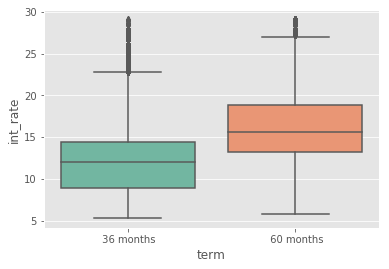

In [103]:
sns.boxplot(x='term', y='int_rate', data=used_data,palette='Set2')

### 5. The Purpose of Loan

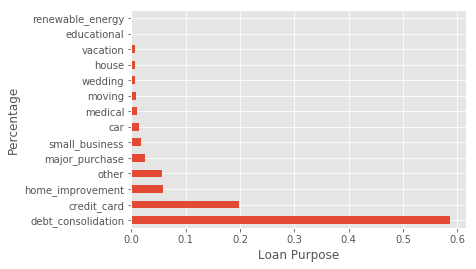

In [136]:
all_rows = proc_filter_data['purpose']
pur = proc_filter_data['purpose'].value_counts()
purp = pur / len(all_rows)
purp.plot(kind='barh')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage')
plt.savefig('loan_amount_purpose.png')
plt.show()

## Data Preprocessing

In [144]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Loan Status

In [129]:
# Keep only the Fully paid, Charged off, and Default

filter_mask = data['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])
filter_data = data[filter_mask]
print(filter_data['loan_status'].value_counts())

Fully Paid     207723
Charged Off     45248
Default          1219
Name: loan_status, dtype: int64


In [130]:
# Create the labels: 'Fully paid'-> 0 'Otherwise' -> 1

def create_label(status):
    label = 1
    if status == 'Fully Paid':
        label = 0
    return label

proc_filter_data = filter_data.copy()
proc_filter_data['label'] = filter_data['loan_status'].apply(create_label)

#### Empolyment Length 

In [132]:
def proc_emp_length(emp_length_val):
    """
            '< 1 year'  -> 0.5
            'n/a'       -> 0.5
            '10+ years' -> 10
             others     -> cosponding years ('2 years' -> 2)
    """

    if emp_length_val == '< 1 year' or emp_length_val == 'n/a':
        emp_length_feat = 0.5
    elif emp_length_val == '10+ years':
        emp_length_feat = 10
    else:
        emp_length_feat = float(emp_length_val.rstrip(' years'))
    return emp_length_feat

proc_filter_data['emp_length_feat'] = filter_data['emp_length'].apply(proc_emp_length)

#### Installment

In [133]:
proc_filter_data['installment_feat'] = proc_filter_data['installment'] / (proc_filter_data['annual_inc'] / 12)


#### Grade 

In [134]:
label_enc = preprocessing.LabelEncoder()
proc_filter_data['grade_feat'] = label_enc.fit_transform(proc_filter_data['grade'].values)

#### Term

In [135]:
proc_filter_data['term_feat'] = proc_filter_data['term'].apply(lambda x: int(x[1:3]))

In [137]:
numeric_cols = ['int_rate', 'grade_feat', 'loan_amnt', 'installment', 'annual_inc', 'dti',
                'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'term_feat',
                'installment_feat', 'emp_length_feat']

In [142]:
category_cols = ['home_ownership','purpose']

label_col = ['label']

user_cols = numeric_cols + category_cols + label_col

final_samples = proc_filter_data[user_cols]

final_samples.dropna(inplace=True) # drop the NaN

proc_data_filepath = 'proc_data.csv'

final_samples.to_csv(os.path.join(proc_data_filepath), index=False)


## Build the Predict Model

In [145]:
data = pd.read_csv('proc_data.csv')
numeric_feat = data[numeric_cols].values
category_val = data[category_cols].values[:, 0] 


#### label encoder

In [146]:
label_enc = preprocessing.LabelEncoder()
label_val = label_enc.fit_transform(category_val)
label_val = label_val.reshape(-1, 1)

#### one-hot encoder

In [147]:
onehot_enc = preprocessing.OneHotEncoder()
category_feat = onehot_enc.fit_transform(label_val)
category_feat = category_feat.toarray()

In [149]:
# form the final features
X = np.hstack((numeric_feat, category_feat))
y = data[label_col].values

#### check the sample status

In [151]:
n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('No. of sample：{}; positive percentage{:.2%}; negative percentage{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])

No. of sample：253934; positive percentage18.28%; negative percentage81.72%
特征维数： 24


#### deal with the imbalance sampling

In [154]:
sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X, y)
print('After SMOTE Oversampling: ')
n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('No. of sample：{}; positive percentage{:.2%}; negative percentage{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))

After SMOTE Oversampling: 
No. of sample：415042; positive percentage50.00%; negative percentage50.00%


#### split the data set

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [156]:
lr_model = LogisticRegression(C=1.0)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

accuracy = metrics.accuracy_score(y_pred, y_test)
precision = metrics.precision_score(y_pred, y_test, pos_label=1)
recall = metrics.recall_score(y_pred, y_test, pos_label=1)

print(accuracy)
print(precision)
print(recall)


0.647410876919
0.672567905157
0.640827726641
